In [4]:
#!pip install langgraph langsmith langchain_groq langchain_community 
#Langchain architecture Installed

In [5]:
groq_api_key="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"

In [6]:
from langchain_groq import ChatGroq

In [8]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

In [11]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [12]:
graph_builder

In [14]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [15]:
graph_builder.add_node('chatbot',chatbot)

In [16]:
graph_builder

In [17]:
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

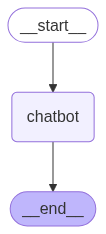

In [18]:
graph_builder.compile()

In [19]:
graph=graph_builder.compile()

In [21]:
while True:
    user_input=input("user:")
    if user_input.lower() in ['quit','q']:
        print("Good Bye, Thank you for using Langraph Framework")
        break
    for event in graph.stream({'messages':('user',user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:',value['messages'].content)

dict_values([{'messages': AIMessage(content="It's exciting to think about the generative AI job openings of 2025!  While predicting the future is always tricky, here are some roles I anticipate will be in high demand based on current trends:\n\n**Directly Working with Generative AI:**\n\n* **Generative AI Trainer/Prompt Engineer:** These specialists will focus on refining and optimizing the performance of generative AI models by crafting effective prompts and providing curated training data.\n* **AI Ethicist/AI Safety Engineer:** As AI becomes more powerful, ensuring responsible and ethical development and deployment will be crucial. These roles will focus on mitigating bias, preventing misuse, and ensuring transparency in AI systems.\n* **Generative AI Architect/System Designer:**  These individuals will design and build the infrastructure and workflows needed to integrate generative AI into various applications and industries.\n* **AI-Powered Content Creator:**  Writers, artists, mus